### Estimação do trabalho remoto potencial, segundo metodologia do texto de discussão 2738 do IPEA (2022, Góes et al.)

#### Base de dados: 
Para a elaboração do trabalho remoto potencial no Brasil, optou-se por utilizar a PNAD Contínua realizada pelo IBGE, para o período imediatamente anterior à crise provocada pela covid-19 – ou  seja, o quarto trimestre de 2019.

#### Adaptação da metodologia de Neiman e Dingel (2020) para a PNAD Contínua:

Foi realizado a adaptação do código de ocupações para o país, com base na ISCO-08.


In [1]:
import pandas as pd

In [159]:
variaveis = [
    'UF',
    'Capital',
    'RM_RIDE',
    'V1022', #Situação do domicílio: urbana ou rural
    'V1027', #Peso do domicílio e das pessoas sem calibração
    'V1028', #Peso do domicílio e das pessoas calibrado
    'V1029', #Projeção da população
    'posest', #Domínios de projeção geográfico
    'V2007', #Sexo
    'V2009', #Idade
    'V2010', #Cor ou raça
    'V3009A', #Curso mais elevado que frequentou anteriormente
    'V4010', #Código da ocupação
    'V4012', #Situação no trabalho
    'VD4020' #Rendimento mensal efetivo de todos os trabalhos
]

In [161]:
#Dados utilizados
cod = pd.read_excel('../Anexos/COD_classificada.xlsx')
pnad = pd.read_feather(r'C:\Users\est.matheus.brasil\Documents\Microdados PNAD Contínua\feather\2019_4.feather', columns=variaveis)

#### Junção da PNAD com o código de ocupações classificado

In [162]:
pnad = pnad.merge(cod, left_on='V4010', right_on='codigo', how='left')

In [163]:
pnad.dropna(subset='V4010', inplace=True)

### Estimativa do trabalho remoto potencial por características do indivíduo

#### Estado

In [164]:
potencial_ufs = pd.crosstab(pnad['UF'], pnad['teletrabalho'], values=pnad['V1028'], aggfunc='sum')
potencial_ufs.rename(columns={0:'Não', 1:'Sim'}, inplace=True)
potencial_ufs['Total'] = potencial_ufs.sum(axis=1) #coluna com total
potencial_ufs['Potencial (%)'] = potencial_ufs['Sim'] / potencial_ufs['Total'] * 100 #coluna com potencial
potencial_ufs['Potencial (%)'] = potencial_ufs['Potencial (%)'].round(2) #arredondando para 2 casas decimais
potencial_ufs.sort_values(by='Potencial (%)', ascending=False, inplace=True) #ordenando por potencial
potencial_ufs

teletrabalho,Não,Sim,Total,Potencial (%)
UF,,,,
Distrito Federal,9.509397e+05,4.946052e+05,1.445545e+06,34.22
São Paulo,1.683842e+07,6.067197e+06,2.290561e+07,26.49
Rio de Janeiro,5.735849e+06,1.965053e+06,7.700903e+06,25.52
Rio Grande do Sul,4.453889e+06,1.340216e+06,5.794105e+06,23.13
Santa Catarina,2.886802e+06,8.640782e+05,3.750880e+06,23.04
Paraná,4.382826e+06,1.270367e+06,5.653193e+06,22.47
Espírito Santo,1.509309e+06,4.256033e+05,1.934912e+06,22.00
Mato Grosso do Sul,1.050255e+06,2.815806e+05,1.331836e+06,21.14
Roraima,1.698791e+05,4.519959e+04,2.150787e+05,21.02


In [143]:
#Brasil
print(f"Potencial de trabalho remoto para o Brasil: {potencial_ufs['Sim'].sum() / potencial_ufs['Total'].sum() * 100:.2f}%")
#uma diferença de 0,54% em relação ao cálculo feito pelo IPEA

Potencial de trabalho remoto para o Brasil: 22.16%


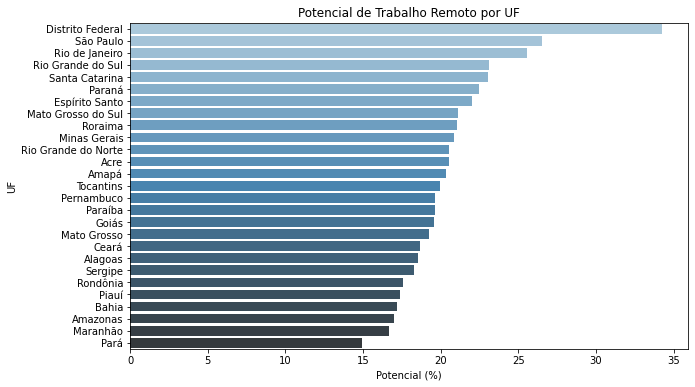

In [168]:
#plotar gráfico de barras horizontal com potencial de trabalho remoto por UF

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Potencial (%)', y=potencial_ufs.index, data=potencial_ufs, orient='h', palette='Blues_d')
plt.title('Potencial de Trabalho Remoto por UF')
plt.xlabel('Potencial (%)')
plt.ylabel('UF')
#fundo branco
ax = plt.gca()
ax.set_facecolor('white')

plt.show()



#### Gênero

In [150]:
potencial_genero = pd.crosstab(pnad['V2007'], pnad['teletrabalho'], values=pnad['V1028'], aggfunc='sum')
potencial_genero.rename(columns={0:'Não', 1:'Sim'}, inplace=True)
potencial_genero['Total'] = potencial_genero.sum(axis=1) #coluna com total
potencial_genero['Potencial (%)'] = potencial_genero['Sim'] / potencial_genero['Total'] * 100 #coluna com potencial
potencial_genero['Potencial (%)'] = potencial_genero['Potencial (%)'].round(2) #arredondando para 2 casas decimais
potencial_genero.sort_values(by='Potencial (%)', ascending=False, inplace=True) #ordenando por potencial
potencial_genero

teletrabalho,Não,Sim,Total,Potencial (%)
V2007,,,,
Mulher,2.883415e+07,1.215092e+07,4.098507e+07,29.65
Homem,4.510037e+07,8.895383e+06,5.399576e+07,16.47


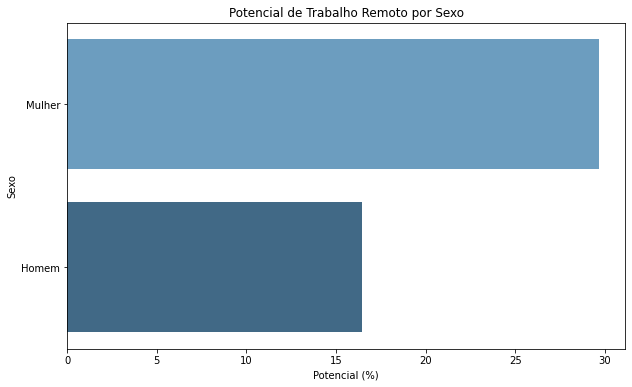

In [151]:
#plotar gráfico de barras horizontal com potencial de trabalho remoto por sexo

plt.figure(figsize=(10, 6))
sns.barplot(x='Potencial (%)', y=potencial_genero.index, data=potencial_genero, orient='h', palette='Blues_d')
plt.title('Potencial de Trabalho Remoto por Sexo')
plt.xlabel('Potencial (%)')
plt.ylabel('Sexo')
plt.show()


#### Raça

In [154]:
potencial_cor = pd.crosstab(pnad['V2010'], pnad['teletrabalho'], values=pnad['V1028'], aggfunc='sum')
potencial_cor.rename(columns={0:'Não', 1:'Sim'}, inplace=True)
potencial_cor['Total'] = potencial_cor.sum(axis=1) #coluna com total
potencial_cor['Potencial (%)'] = potencial_cor['Sim'] / potencial_cor['Total'] * 100 #coluna com potencial
potencial_cor['Potencial (%)'] = potencial_cor['Potencial (%)'].round(2) #arredondando para 2 casas decimais
potencial_cor.sort_values(by='Potencial (%)', ascending=False, inplace=True) #ordenando por potencial
potencial_cor

teletrabalho,Não,Sim,Total,Potencial (%)
V2010,,,,
Amarela,4.421019e+05,2.331716e+05,6.752735e+05,34.53
Ignorado,1.057382e+04,4.823296e+03,1.539711e+04,31.33
Branca,2.986775e+07,1.191686e+07,4.178461e+07,28.52
Parda,3.514143e+07,7.198498e+06,4.233993e+07,17.00
Preta,8.189410e+06,1.636550e+06,9.825960e+06,16.66
Indígena,2.832571e+05,5.639370e+04,3.396508e+05,16.60


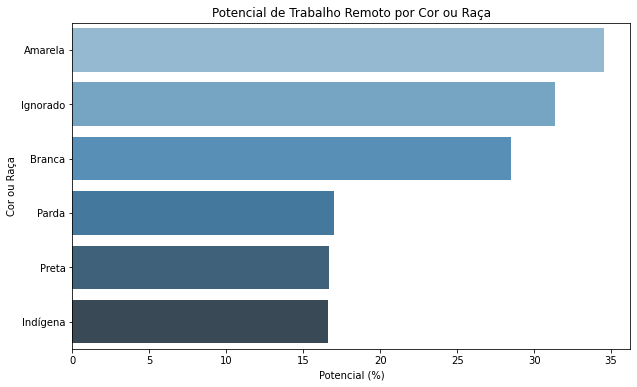

In [155]:
#plotar gráfico de barras horizontal com potencial de trabalho remoto por cor ou raça

plt.figure(figsize=(10, 6))
sns.barplot(x='Potencial (%)', y=potencial_cor.index, data=potencial_cor, orient='h', palette='Blues_d')
plt.title('Potencial de Trabalho Remoto por Cor ou Raça')
plt.xlabel('Potencial (%)')
plt.ylabel('Cor ou Raça')
plt.show()

#### Escolaridade

In [157]:
pd.crosstab(pnad['V3003'], pnad['teletrabalho'], values=pnad['V1028'], aggfunc='sum')

teletrabalho
V3003


In [165]:
potencial_escolaridade = pd.crosstab(pnad['V3009A'], pnad['teletrabalho'], values=pnad['V1028'], aggfunc='sum')
potencial_escolaridade.rename(columns={0:'Não', 1:'Sim'}, inplace=True)
potencial_escolaridade['Total'] = potencial_escolaridade.sum(axis=1) #coluna com total
potencial_escolaridade['Potencial (%)'] = potencial_escolaridade['Sim'] / potencial_escolaridade['Total'] * 100 #coluna com potencial
potencial_escolaridade['Potencial (%)'] = potencial_escolaridade['Potencial (%)'].round(2) #arredondando para 2 casas decimais
potencial_escolaridade.sort_values(by='Potencial (%)', ascending=False, inplace=True) #ordenando por potencial
potencial_escolaridade

teletrabalho,Não,Sim,Total,Potencial (%)
V3009A,,,,
Doutorado,7.695497e+04,2.210389e+05,2.979938e+05,74.18
Mestrado,2.247999e+05,4.784173e+05,7.032172e+05,68.03
Especialização de nível superior,1.681251e+06,3.179695e+06,4.860946e+06,65.41
Superior - graduação,7.395922e+06,7.617912e+06,1.501383e+07,50.74
"Antigo científico, clássico, etc. (médio 2º ciclo)",2.894279e+05,8.314354e+04,3.725715e+05,22.32
Regular do ensino médio ou do 2º grau,3.046401e+07,4.641910e+06,3.510592e+07,13.22
Educação de jovens e adultos (EJA) ou supletivo do 2º grau,1.453450e+06,1.525027e+05,1.605953e+06,9.50
Antigo ginásio (médio 1º ciclo),5.710095e+05,4.601620e+04,6.170257e+05,7.46
Educação de jovens e adultos (EJA) ou supletivo do 1º grau,7.064567e+05,4.073841e+04,7.471951e+05,5.45


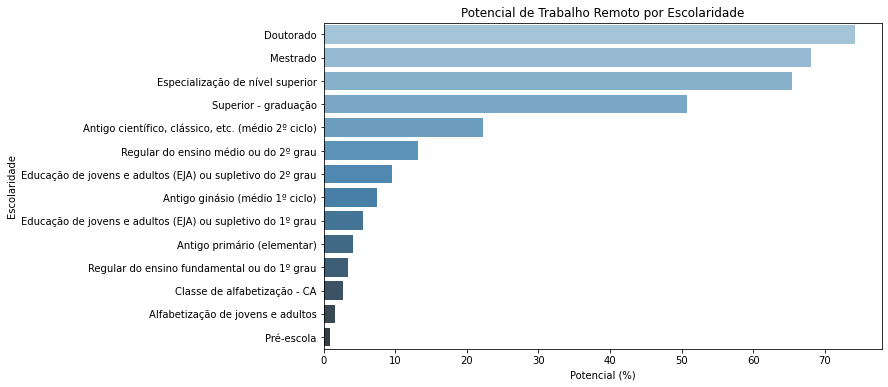

In [167]:
#plotar gráfico de barras horizontal com potencial de trabalho remoto por escolaridade

plt.figure(figsize=(10, 6))
sns.barplot(x='Potencial (%)', y=potencial_escolaridade.index, data=potencial_escolaridade, orient='h', palette='Blues_d')
plt.title('Potencial de Trabalho Remoto por Escolaridade')
plt.xlabel('Potencial (%)')
plt.ylabel('Escolaridade')
plt.show()
